In [2]:
# Import Libraries
import pandas as pd
import great_tables as gt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [32]:
cf_data = pd.read_csv("CF-Route-Distance-Comparison.csv")

cf_data = cf_data.rename(columns={"center_field":"player"})
cf_data = cf_data.drop(columns=["start_time","end_time"])
cf_data.head()

,game_str,play_id,play_per_game,player,hang_time,d_straight,d_total,route_eff
0,y1_d070_ACN_QEA,45,45,ACN-1147,3.30,32.349912,32.850574,0.984759
1,y1_d070_ACN_QEA,48,48,ACN-1147,6.00,51.892470,61.562647,0.842921
2,y1_d070_ACN_QEA,124,124,QEA-0365,3.20,32.697107,33.066236,0.988837
3,y1_d070_ACN_QEA,196,196,ACN-1147,4.00,53.123101,53.634149,0.990472
4,y1_d071_ACN_QEA,35,35,ACN-1147,6.05,46.910212,52.663956,0.890746


In [31]:
print(cf_data.dtypes)

game_str          object
play_id            int64
play_per_game      int64
end_time           int64
start_time         int64
player            object
hang_time        float64
d_straight       float64
d_total          float64
route_eff        float64
speed            float64
dtype: object


In [28]:
# Add on an average speed column
cf_data["speed"] = cf_data["d_total"] / cf_data["hang_time"]

# Arrange the cf_data by speed
cf_data = cf_data.sort_values("speed", ascending = False)

(
    # Convert to a great-table
    gt.GT(cf_data.head(10))
    # Title/Subtitle
    .tab_header(title = "Top 10 CF Catches by Speed (ft/sec)")
    # Format columns to a certain number of decimal points
    .fmt_number(columns = ["d_straight", "d_total", "speed"], decimals = 1)
    # Makes decimals appear as a percent in the GT Table
    .fmt_percent(columns="route_eff", decimals = 1)
    # Hide irrelevant columns without deleting them from the data frame
    .cols_hide(["play_per_game", "route_eff", "game_str", "play_id"])
    # Rename columns for the table
    .cols_label(
        player = "Player",
        hang_time = "Hang Time",
        d_straight = "Straight",    
        d_total = "Total",
        speed = "Speed"
    )
    # Make a label that spans multiple columns
    .tab_spanner(
        label = "Distance",
        columns = ["d_straight", "d_total"]
    )
    # Align all columns to center
    .cols_align("center")
    # Color rows with Player YJD-0338 Dark Blue
    .tab_style(
    # How to style the cells
    style = gt.style.fill(color="#092C5C"),
    # Which cells to style
    locations = gt.loc.body(columns = "player",
                           rows = [0,1,4,5,8])
    )
    # Make text color white for Player YJD-0338
    .tab_style(
    # How to style the cells
    style = gt.style.text(color="white"),
    # Which cells to style
    locations = gt.loc.body(columns = "player",
                           rows = [0,1,4,5,8])
    )
    # Color rows with Player YJD-0193 Light Blue
    .tab_style(
    style = gt.style.fill(color="#8FBCE6"),
    locations = gt.loc.body(columns = "player",
                           rows = [2, 7, 9])
    )
    # Color Rows with Player RZQ-0274 Yellow/Gold
    .tab_style(
    style = gt.style.fill(color="#F5D130"),
    locations = gt.loc.body(columns = "player",
                           rows = [3, 6])
    )
    # To save the table
    # .save("Top-10-CF-Catches-By-Speed.png")
)

GT(_tbl_data=            game_str  play_id  play_per_game  end_time  start_time    player  \
246  y1_d036_HMN_RZQ       32             32    938708      933508  HMN-1226   
258  y1_d039_HMN_RZQ       19             19    592045      586445  HMN-1226   
250  y1_d037_HMN_RZQ       15             15    565475      561425  HMN-1226   
252  y1_d037_HMN_RZQ       61             61   2009725     2005825  HMN-1226   

     hang_time  d_straight     d_total  route_eff      speed  
246       5.20   89.750321  105.907624   0.847440  20.366851  
258       5.60   97.007510  103.757793   0.934942  18.528177  
250       4.05   45.962580   49.514621   0.928263  12.225832  
252       3.90   37.797859   38.052994   0.993295   9.757178  , _body=<great_tables._gt_data.Body object at 0x0000023FEC67B680>, _boxhead=Boxhead([ColInfo(var='game_str', type=<ColInfoTypeEnum.hidden: 4>, column_label='game_str', column_align='center', column_width=None), ColInfo(var='play_id', type=<ColInfoTypeEnum.hidden: 4>, column_label='play_id', column_align='center', column_width=None), ColInfo(var='play_per_game', type=<ColInfoTypeEnum.hidden: 4>, column_label='play_per_game', column_align='center', column_width=None), ColInfo(var='end_time', type=<ColInfoTypeEnum.default: 1>, column_label='end_time', column_align='center', column_width=None), ColInfo(var='start_time', type=<ColInfoTypeEnum.default: 1>, column_label='start_time', column_align='center', column_width=None), ColInfo(var='player', type=<ColInfoTypeEnum.default: 1>, column_label='Player', column_align='center', column_width=None), ColInfo(var='hang_time', type=<ColInfoTypeEnum.default: 1>, column_label='Hang Time', column_align='center', column_width=None), ColInfo(var='d_straight', type=<ColInfoTypeEnum.default: 1>, column_label='Straight', column_align='center', column_width=None), ColInfo(var='d_total', type=<ColInfoTypeEnum.default: 1>, column_label='Total', column_align='center', column_width=None), ColInfo(var='route_eff', type=<ColInfoTypeEnum.hidden: 4>, column_label='route_eff', column_align='center', column_width=None), ColInfo(var='speed', type=<ColInfoTypeEnum.default: 1>, column_label='Speed', column_align='center', column_width=None)]), _stub=<great_tables._gt_data.Stub object at 0x0000023FEC863FE0>, _spanners=Spanners([SpannerInfo(spanner_id='Distance', spanner_level=0, spanner_label='Distance', spanner_units=None, spanner_pattern=None, vars=['d_straight', 'd_total'], built=None)]), _heading=Heading(title='Top 10 CF Catches by Speed (ft/sec)', subtitle=None, preheader=None), _stubhead=None, _source_notes=[], _footnotes=[], _styles=[StyleInfo(locname=LocBody(columns='player', rows=[0, 1, 4, 5, 8], mask=None), grpname=None, colname='player', rownum=0, colnum=None, styles=[CellStyleFill(color='#092C5C')]), StyleInfo(locname=LocBody(columns='player', rows=[0, 1, 4, 5, 8], mask=None), grpname=None, colname='player', rownum=1, colnum=None, styles=[CellStyleFill(color='#092C5C')]), StyleInfo(locname=LocBody(columns='player', rows=[0, 1, 4, 5, 8], mask=None), grpname=None, colname='player', rownum=0, colnum=None, styles=[CellStyleText(color='white', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns='player', rows=[0, 1, 4, 5, 8], mask=None), grpname=None, colname='player', rownum=1, colnum=None, styles=[CellStyleText(color='white', font=None, size=None, align=None, v_align=None, style=None, weight=None, stretch=None, decorate=None, transform=None, whitespace=None)]), StyleInfo(locname=LocBody(columns='player', rows=[2, 7, 9], mask=None), grpname=None, colname='player', rownum=2, colnum=None, styles=[CellStyleFill(color='#8FBCE6')]), StyleInfo(locname=LocBody(columns='player', rows=[3, 6], mask=None), grpname=None, colname='player', rownum=3, colnum=None, styles=[CellStyleFill(color='#F5D130')])], _locale=<great_tables._gt_data.Locale object at 0x0000023FEFA820C0>, _formats=[<gr

In [41]:
len(cf_data[cf_data["player"]=="YJD-0193"])

42

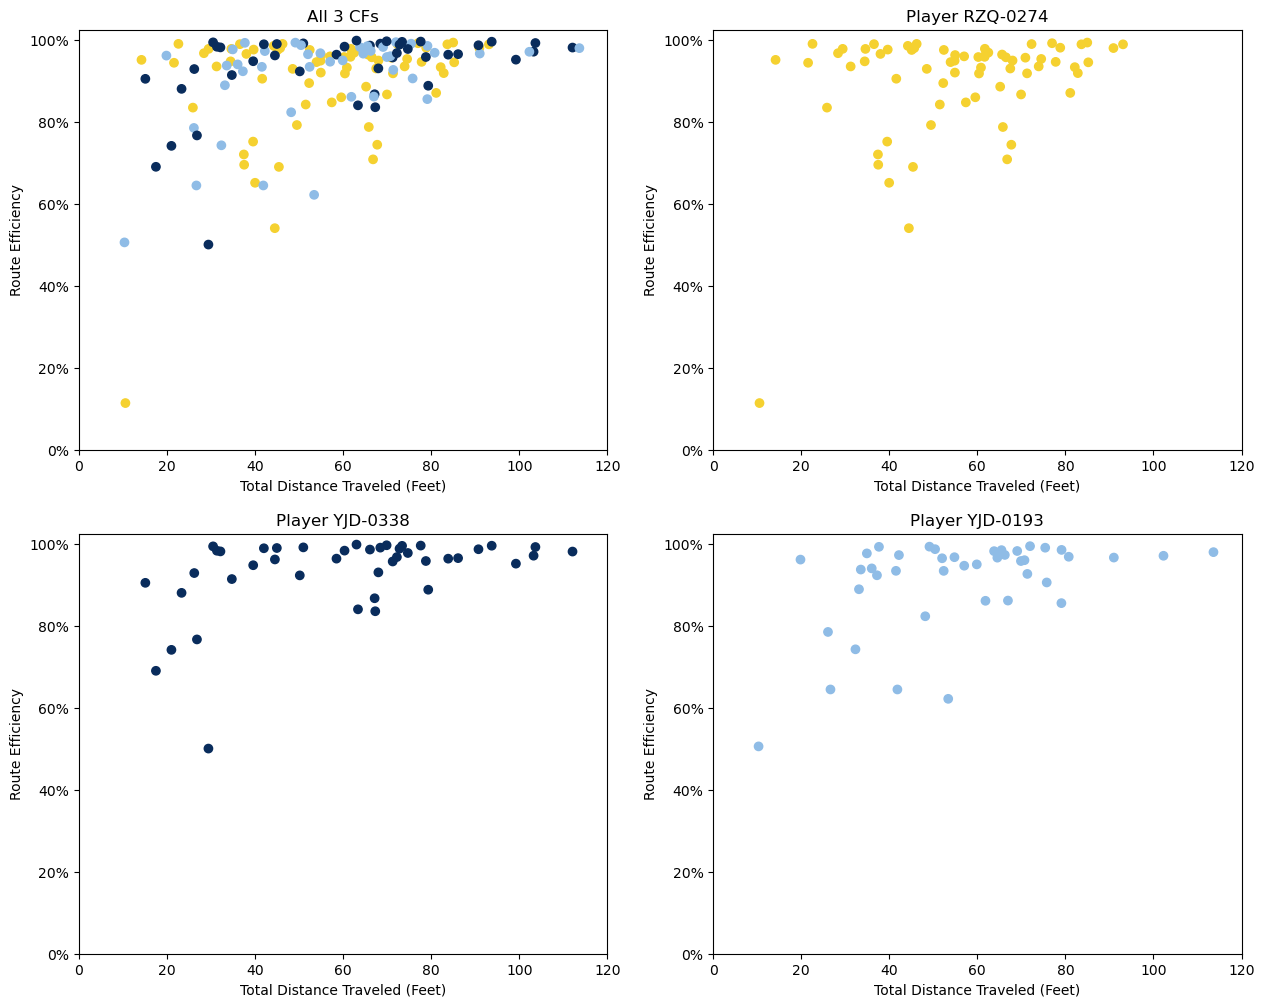

<Figure size 640x480 with 0 Axes>

In [44]:
# Set up dimenstions of plotting figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (15, 12))

# Map Colors to the players using a dictionary
colors = {
        "RZQ-0274":"#F5D130",
        "YJD-0338":"#092C5C",
        "YJD-0193":"#8FBCE6"
}

# Full Dataset
# Create a Scatter Plot
valid_players = list(colors.keys())
cf_subset = cf_data[cf_data["player"].isin(valid_players)]

ax1.scatter(
    cf_subset['d_total'],
    cf_subset['route_eff'],
    c=cf_subset["player"].map(colors)
)
# X/Y Axis Labels
ax1.set_xlabel("Total Distance Traveled (Feet)")
ax1.set_ylabel("Route Efficiency")
# Subplot title
ax1.title.set_text('All 3 CFs')
# Convert y-axis to %s
ax1.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# Stablize x and y-axis
ax1.set_xlim([0, 120])
ax1.set_ylim([0, 1.025])


# Only RZQ-0274 Data
player1_data = cf_data[cf_data["player"] == "RZQ-0274"]
ax2.scatter(player1_data['d_total'], player1_data['route_eff'], c = player1_data["player"].map(colors))
ax2.set_xlabel("Total Distance Traveled (Feet)")
ax2.set_ylabel("Route Efficiency")
ax2.title.set_text('Player RZQ-0274')
ax2.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# Stablize x and y-axis
ax2.set_xlim([0, 120])
ax2.set_ylim([0, 1.025])


# Only YJD-0338 Data
player2_data = cf_data[cf_data["player"] == "YJD-0338"]
ax3.scatter(player2_data['d_total'], player2_data['route_eff'], c = player2_data["player"].map(colors))
ax3.set_xlabel("Total Distance Traveled (Feet)")
ax3.set_ylabel("Route Efficiency")
ax3.title.set_text('Player YJD-0338')
ax3.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# Stablize x and y-axis
ax3.set_xlim([0, 120])
ax3.set_ylim([0, 1.025])


# Only YJD-0193 Data
player3_data = cf_data[cf_data["player"] == "YJD-0193"]
ax4.scatter(player3_data['d_total'], player3_data['route_eff'], c = player3_data["player"].map(colors))
ax4.set_xlabel("Total Distance Traveled (Feet)")
ax4.set_ylabel("Route Efficiency")
ax4.title.set_text('Player YJD-0193')
ax4.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# Stablize x and y-axis
ax4.set_xlim([0, 120])
ax4.set_ylim([0, 1.025])

# Show the Plot
plt.show()

# Save the Figure
plt.savefig('cf_total_distance_vs_route_eff.png')